In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Svitlana\Desktop\Projekt_2025\Soldatko_Svitlana_Projekt_2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_link = "geethasagarbonthu/marketing-and-e-commerce-analytics-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\marketing-and-e-commerce-analytics-dataset' already exists with files. Skipping download (replace=False).


In [4]:
files

['campaigns.csv',
 'customers.csv',
 'events.csv',
 'products.csv',
 'transactions.csv']

In [5]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144


In [6]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(50, 7)

'Description'

,count,mean,std,min,25%,50%,75%,max
campaign_id,50.0,25.50,14.58,1.00,13.25,25.50,37.75,50.00
expected_uplift,50.0,0.09,0.04,0.02,0.06,0.09,0.11,0.14


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
campaign_id,int64,0,50,"[8, 17, 34]"
channel,object,0,5,"[Display, Paid Search, Email]"
objective,object,0,4,"[Acquisition, Reactivation, Reactivation]"
start_date,object,0,49,"[2022-02-15, 2021-11-28, 2023-08-13]"
end_date,object,0,48,"[2021-09-23, 2023-01-14, 2023-03-27]"
target_segment,object,0,5,"[High Value, Churn Risk, All]"
expected_uplift,float64,0,43,"[0.116, 0.107, 0.078]"


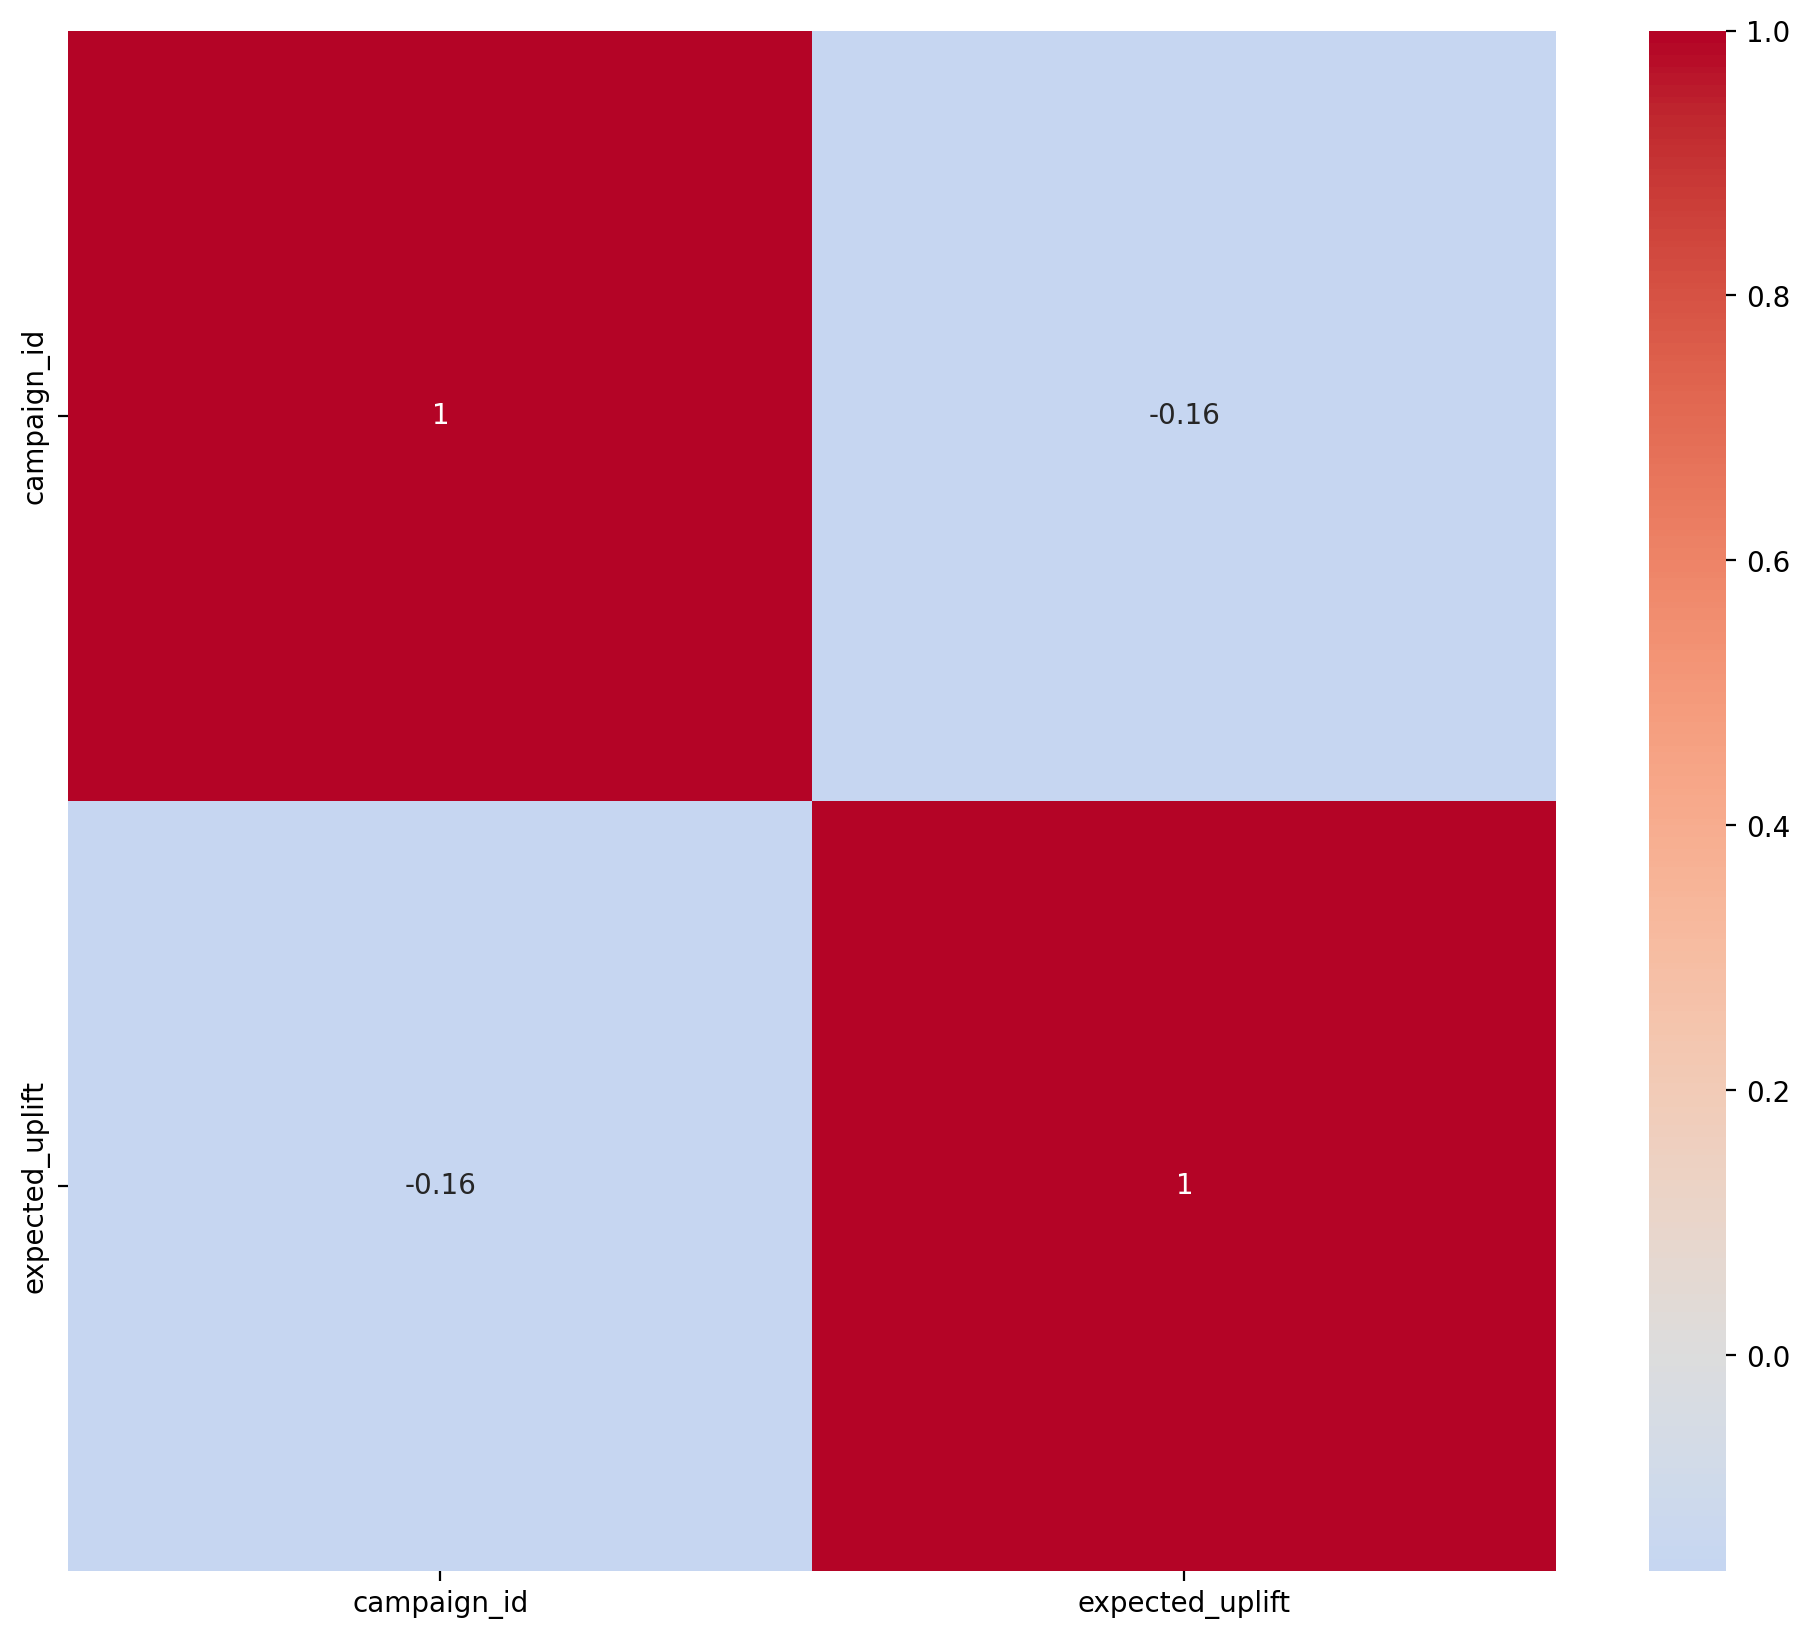

In [7]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [9]:
import pandas as pd
dataset_name = "marketing-and-e-commerce-analytics-dataset"
campaigns = pd.read_csv(f"../data/raw/{dataset_name}/campaigns.csv")
customers = pd.read_csv(f"../data/raw/{dataset_name}/customers.csv")
events = pd.read_csv(f"../data/raw/{dataset_name}/events.csv")
products = pd.read_csv(f"../data/raw/{dataset_name}/products.csv")
transactions = pd.read_csv(f"../data/raw/{dataset_name}/transactions.csv")



display(campaigns.head())
display(customers.head())
display(events.head())
display(products.head())
display(transactions.head())



,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144


,customer_id,signup_date,country,age,gender,loyalty_tier,acquisition_channel
0,1,2021-04-08,BR,48,Male,Bronze,Referral
1,2,2023-04-28,IN,36,Female,Silver,Organic
2,3,2022-12-18,UK,35,Female,Silver,Organic
3,4,2022-04-26,US,45,Male,Silver,Paid Search
4,5,2022-04-20,IN,53,Male,Silver,Organic


,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group
0,1,2021-01-14 13:35:43,43812,535101,view,1004.0,desktop,Email,43,PLP,115.1,Control
1,2,2021-12-03 21:36:50,71340,96426,add_to_cart,986.0,desktop,Email,10,PDP,32.4,Variant_A
2,3,2021-12-27 08:25:15,59540,220126,purchase,1630.0,mobile,Organic,0,PDP,190.7,Variant_A
3,4,2022-01-22 15:06:54,3601,484555,add_to_cart,1532.0,desktop,Paid Search,30,Checkout,134.8,Variant_B
4,5,2021-05-10 12:03:09,92735,60646,bounce,NaN,desktop,Email,26,PLP,53.1,Variant_A


,product_id,category,brand,base_price,launch_date,is_premium
0,1,Grocery,Brand_58,14.19,2021-08-02,0
1,2,Fashion,Brand_1,25.80,2021-09-14,0
2,3,Electronics,Brand_70,165.46,2021-01-18,1
3,4,Fashion,Brand_56,75.45,2023-03-03,1
4,5,Sports,Brand_1,72.50,2022-04-19,1


,transaction_id,timestamp,customer_id,product_id,quantity,discount_applied,gross_revenue,campaign_id,refund_flag
0,1,2021-12-27 08:25:15,59540,1630.0,3,0.00,43.74,0,0
1,2,2023-06-06 21:14:26,54871,1901.0,3,0.00,174.78,21,0
2,3,2023-08-31 05:29:54,51818,1884.0,1,0.00,40.61,37,0
3,4,2022-06-26 20:33:46,18164,1114.0,2,0.15,68.76,13,0
4,5,2023-07-26 18:12:35,86915,408.0,1,0.00,14.64,4,0


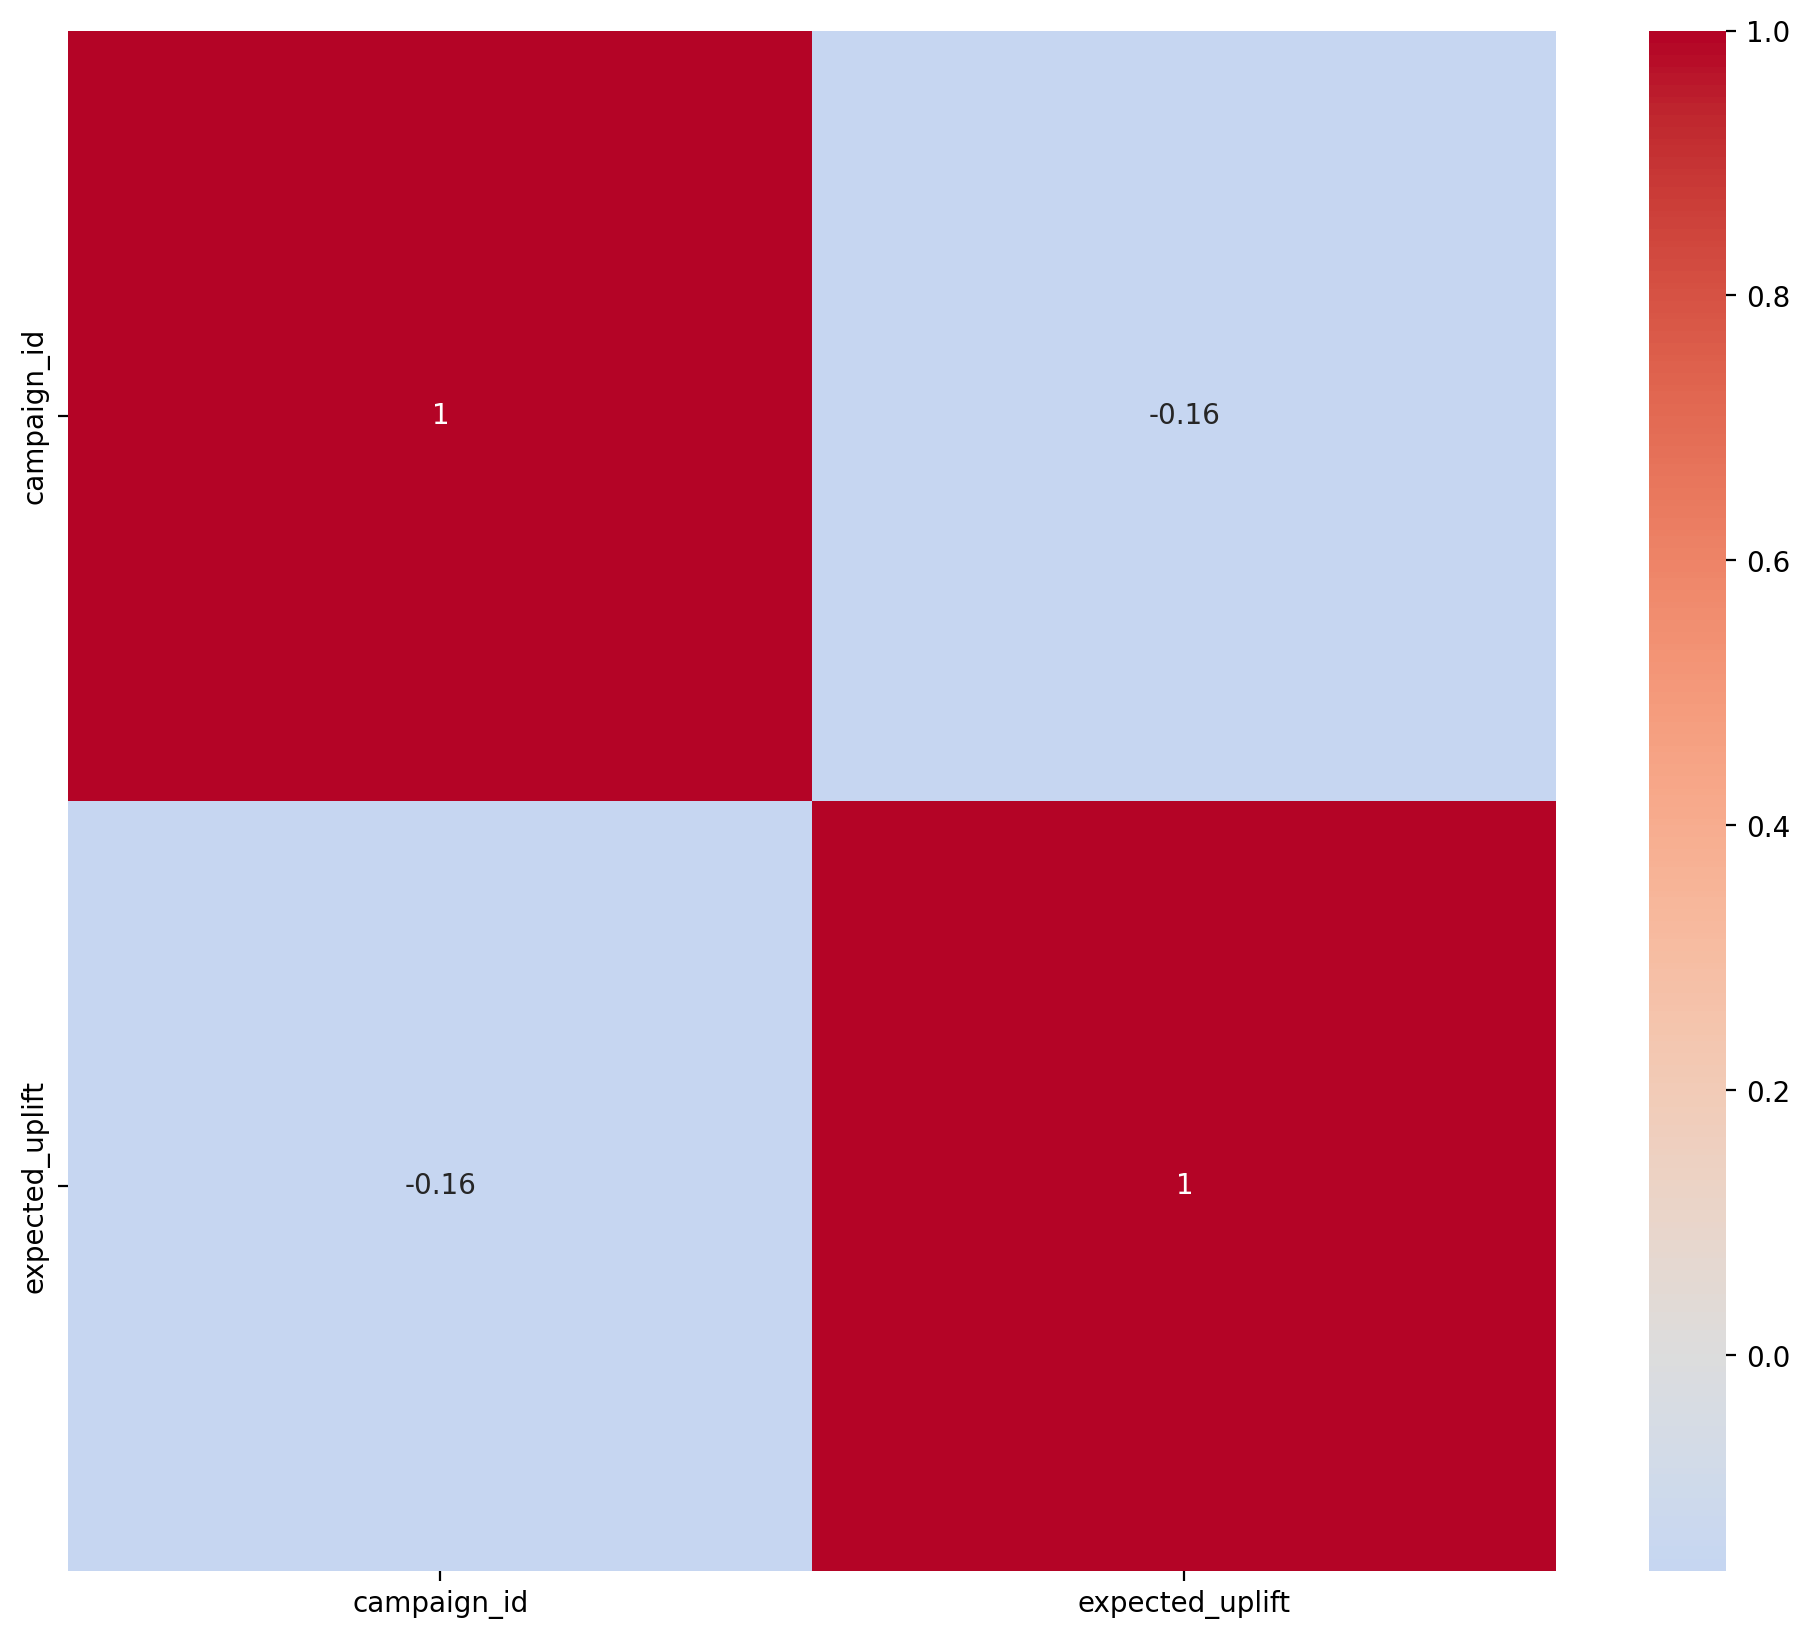

In [10]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [11]:
import pandas as pd

dataset_name = "marketing-and-e-commerce-analytics-dataset"

# Weg zur Daten
base_path = f"../data/raw/{dataset_name}"

campaigns = pd.read_csv(f"{base_path}/campaigns.csv")
customers = pd.read_csv(f"{base_path}/customers.csv")
events = pd.read_csv(f"{base_path}/events.csv")
products = pd.read_csv(f"{base_path}/products.csv")
transactions = pd.read_csv(f"{base_path}/transactions.csv")

# Names
print("Campaigns:", list(campaigns.columns))
print("Customers:", list(customers.columns))
print("Events:", list(events.columns))
print("Products:", list(products.columns))
print("Transactions:", list(transactions.columns))

Campaigns: ['campaign_id', 'channel', 'objective', 'start_date', 'end_date', 'target_segment', 'expected_uplift']
Customers: ['customer_id', 'signup_date', 'country', 'age', 'gender', 'loyalty_tier', 'acquisition_channel']
Events: ['event_id', 'timestamp', 'customer_id', 'session_id', 'event_type', 'product_id', 'device_type', 'traffic_source', 'campaign_id', 'page_category', 'session_duration_sec', 'experiment_group']
Products: ['product_id', 'category', 'brand', 'base_price', 'launch_date', 'is_premium']
Transactions: ['transaction_id', 'timestamp', 'customer_id', 'product_id', 'quantity', 'discount_applied', 'gross_revenue', 'campaign_id', 'refund_flag']


In [12]:
import duckdb

duckdb.sql("""
    SELECT *
    FROM '../data/raw/marketing-and-e-commerce-analytics-dataset/campaigns.csv'
    LIMIT 5
""").show()

┌─────────────┬─────────────┬──────────────┬────────────┬────────────┬────────────────┬─────────────────┐
│ campaign_id │   channel   │  objective   │ start_date │  end_date  │ target_segment │ expected_uplift │
│    int64    │   varchar   │   varchar    │    date    │    date    │    varchar     │     double      │
├─────────────┼─────────────┼──────────────┼────────────┼────────────┼────────────────┼─────────────────┤
│           1 │ Paid Search │ Cross-sell   │ 2021-10-25 │ 2021-11-26 │ Deal Seekers   │           0.022 │
│           2 │ Email       │ Retention    │ 2021-10-24 │ 2021-12-24 │ Deal Seekers   │           0.116 │
│           3 │ Email       │ Reactivation │ 2023-10-08 │ 2023-11-30 │ Churn Risk     │             0.1 │
│           4 │ Display     │ Reactivation │ 2022-07-25 │ 2022-10-07 │ Deal Seekers   │           0.111 │
│           5 │ Social      │ Acquisition  │ 2022-07-09 │ 2022-09-29 │ New Customers  │           0.144 │
└─────────────┴─────────────┴──────────────┴──

In [13]:
base = "../data/raw/marketing-and-e-commerce-analytics-dataset"

tables = ["campaigns", "customers", "events", "products", "transactions"]

for t in tables:
    print(f"\n=== {t.upper()} ===")
    duckdb.sql(f"SELECT * FROM '{base}/{t}.csv' LIMIT 5").show()


=== CAMPAIGNS ===
┌─────────────┬─────────────┬──────────────┬────────────┬────────────┬────────────────┬─────────────────┐
│ campaign_id │   channel   │  objective   │ start_date │  end_date  │ target_segment │ expected_uplift │
│    int64    │   varchar   │   varchar    │    date    │    date    │    varchar     │     double      │
├─────────────┼─────────────┼──────────────┼────────────┼────────────┼────────────────┼─────────────────┤
│           1 │ Paid Search │ Cross-sell   │ 2021-10-25 │ 2021-11-26 │ Deal Seekers   │           0.022 │
│           2 │ Email       │ Retention    │ 2021-10-24 │ 2021-12-24 │ Deal Seekers   │           0.116 │
│           3 │ Email       │ Reactivation │ 2023-10-08 │ 2023-11-30 │ Churn Risk     │             0.1 │
│           4 │ Display     │ Reactivation │ 2022-07-25 │ 2022-10-07 │ Deal Seekers   │           0.111 │
│           5 │ Social      │ Acquisition  │ 2022-07-09 │ 2022-09-29 │ New Customers  │           0.144 │
└─────────────┴────────────

In [14]:
import duckdb

df_ss = duckdb.sql("""
SELECT 
    -- Events
    e.event_id,
    e.timestamp,
    e.customer_id,
    e.session_id,
    e.event_type,
    e.product_id,
    e.device_type,
    e.traffic_source,
    e.campaign_id,
    e.page_category,
    e.session_duration_sec,
    e.experiment_group,

    -- Customers
    c.signup_date,
    c.country,
    c.age,
    c.gender,
    c.loyalty_tier,
    c.acquisition_channel,

    -- Campaigns
    ca.channel AS campaign_channel,
    ca.objective AS campaign_objective,
    ca.start_date AS campaign_start_date,
    ca.end_date AS campaign_end_date,
    ca.target_segment AS campaign_target_segment,
    ca.expected_uplift,

    -- Products
    p.category,
    p.brand,
    p.base_price,
    p.launch_date,
    p.is_premium,

    -- Transactions
    t.transaction_id,
    t.quantity,
    t.discount_applied,
    t.gross_revenue,
    t.refund_flag

FROM '../data/raw/marketing-and-e-commerce-analytics-dataset/events.csv' e

LEFT JOIN '../data/raw/marketing-and-e-commerce-analytics-dataset/customers.csv' c
    ON e.customer_id = c.customer_id

LEFT JOIN '../data/raw/marketing-and-e-commerce-analytics-dataset/campaigns.csv' ca
    ON e.campaign_id = ca.campaign_id

LEFT JOIN '../data/raw/marketing-and-e-commerce-analytics-dataset/products.csv' p
    ON e.product_id = p.product_id

LEFT JOIN '../data/raw/marketing-and-e-commerce-analytics-dataset/transactions.csv' t
    ON e.customer_id = t.customer_id 
    AND e.product_id = t.product_id
    
""").df()

In [15]:
df_ss.dtypes

event_id                            int64
timestamp                  datetime64[us]
customer_id                         int64
session_id                          int64
event_type                         object
product_id                        float64
device_type                        object
traffic_source                     object
campaign_id                         int64
page_category                      object
session_duration_sec              float64
experiment_group                   object
signup_date                datetime64[us]
country                            object
age                                 int64
gender                             object
loyalty_tier                       object
acquisition_channel                object
campaign_channel                   object
campaign_objective                 object
campaign_start_date        datetime64[us]
campaign_end_date          datetime64[us]
campaign_target_segment            object
expected_uplift                   

In [16]:
cat_columns = [
    'event_type', 'device_type', 'traffic_source', 'page_category',
    'experiment_group', 'country', 'gender', 'loyalty_tier',
    'acquisition_channel', 'campaign_channel', 'campaign_objective',
    'campaign_target_segment', 'category', 'brand'
]

df_ss[cat_columns] = df_ss[cat_columns].astype('category')
df_ss.dtypes

event_id                            int64
timestamp                  datetime64[us]
customer_id                         int64
session_id                          int64
event_type                       category
product_id                        float64
device_type                      category
traffic_source                   category
campaign_id                         int64
page_category                    category
session_duration_sec              float64
experiment_group                 category
signup_date                datetime64[us]
country                          category
age                                 int64
gender                           category
loyalty_tier                     category
acquisition_channel              category
campaign_channel                 category
campaign_objective               category
campaign_start_date        datetime64[us]
campaign_end_date          datetime64[us]
campaign_target_segment          category
expected_uplift                   

In [17]:
df_ss['product_id'] = df_ss['product_id'].astype('Int64')

In [18]:
df_ss.dtypes

event_id                            int64
timestamp                  datetime64[us]
customer_id                         int64
session_id                          int64
event_type                       category
product_id                          Int64
device_type                      category
traffic_source                   category
campaign_id                         int64
page_category                    category
session_duration_sec              float64
experiment_group                 category
signup_date                datetime64[us]
country                          category
age                                 int64
gender                           category
loyalty_tier                     category
acquisition_channel              category
campaign_channel                 category
campaign_objective               category
campaign_start_date        datetime64[us]
campaign_end_date          datetime64[us]
campaign_target_segment          category
expected_uplift                   

In [19]:
print(df_ss.isna().sum())
print("\n")

event_id                         0
timestamp                        0
customer_id                      0
session_id                       0
event_type                       0
product_id                  200371
device_type                  40300
traffic_source                   0
campaign_id                      0
page_category                    0
session_duration_sec             0
experiment_group                 0
signup_date                      0
country                          0
age                              0
gender                           0
loyalty_tier                     0
acquisition_channel              0
campaign_channel           1000264
campaign_objective         1000264
campaign_start_date        1000264
campaign_end_date          1000264
campaign_target_segment    1000264
expected_uplift            1000264
category                    200371
brand                       200371
base_price                  200371
launch_date                 200371
is_premium          

In [20]:
cat_fill = [
    'campaign_channel', 'campaign_objective', 'campaign_target_segment',
    'category', 'brand']

for col in cat_fill:
    
    df_ss[col] = df_ss[col].cat.add_categories('Unknown')
    # füllen die fehlenden Werte mit dieser Kategorie aus
    df_ss[col] = df_ss[col].fillna('Unknown')


In [21]:
print(df_ss[cat_fill].isna().sum())


campaign_channel           0
campaign_objective         0
campaign_target_segment    0
category                   0
brand                      0
dtype: int64


In [22]:
display(
    "Shape",
    df_ss.shape,
    "Description",
    df_ss.describe().round(2).T,
    "Duplicates",
    df_ss.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_ss.dtypes,
        "Missing Values": df_ss.isnull().sum(),
        "Unique Values": df_ss.nunique(),
        "Sample Values": [df_ss[col].sample(3).tolist() for col in df_ss.columns]
    })


'Shape'

(2000056, 34)

'Description'

,count,mean,min,25%,50%,75%,max,std
event_id,2000056.0,1000000.21,1.0,500001.75,1000002.5,1499996.25,2000000.0,577348.8
timestamp,2000056,2022-07-02 16:07:55.176471,2021-01-01 00:01:28,2021-10-02 03:37:33,2022-07-02 16:53:50.500000,2023-04-02 06:18:03.500000,2023-12-31 23:57:50,NaN
customer_id,2000056.0,50012.01,1.0,25010.0,50009.0,75038.0,100000.0,28879.5
session_id,2000056.0,333051.71,1.0,166229.75,332820.0,499772.0,666666.0,192471.97
product_id,1799685.0,1000.11,1.0,500.0,1000.0,1501.0,2000.0,577.67
campaign_id,2000056.0,12.76,0.0,0.0,0.0,26.0,50.0,16.34
session_duration_sec,2000056.0,130.64,0.1,58.1,101.7,164.0,7533.8,159.04
signup_date,2000056,2022-07-01 18:21:50.478506,2021-01-01 00:00:00,2021-10-01 00:00:00,2022-07-03 00:00:00,2023-04-01 00:00:00,2023-12-31 00:00:00,NaN
age,2000056.0,35.23,18.0,28.0,35.0,42.0,70.0,9.6
campaign_start_date,999792,2022-07-04 18:44:06.291228,2021-01-20 00:00:00,2021-11-07 00:00:00,2022-07-25 00:00:00,2023-03-19 00:00:00,2023-11-04 00:00:00,NaN


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
event_id,int64,0,2000000,"[1810285, 239572, 242554]"
timestamp,datetime64[us],0,1977065,"[2023-05-17 01:41:35, 2022-08-28 17:45:23, 202..."
customer_id,int64,0,100000,"[43668, 42817, 13307]"
session_id,int64,0,633462,"[96532, 344565, 119434]"
event_type,category,0,5,"[purchase, click, add_to_cart]"
product_id,Int64,200371,2000,"[230, 1276, 482]"
device_type,category,40300,3,"[mobile, desktop, mobile]"
traffic_source,category,0,10,"[Paid Search, Email, Social]"
campaign_id,int64,0,51,"[0, 0, 0]"
page_category,category,0,5,"[PLP, PLP, Checkout]"


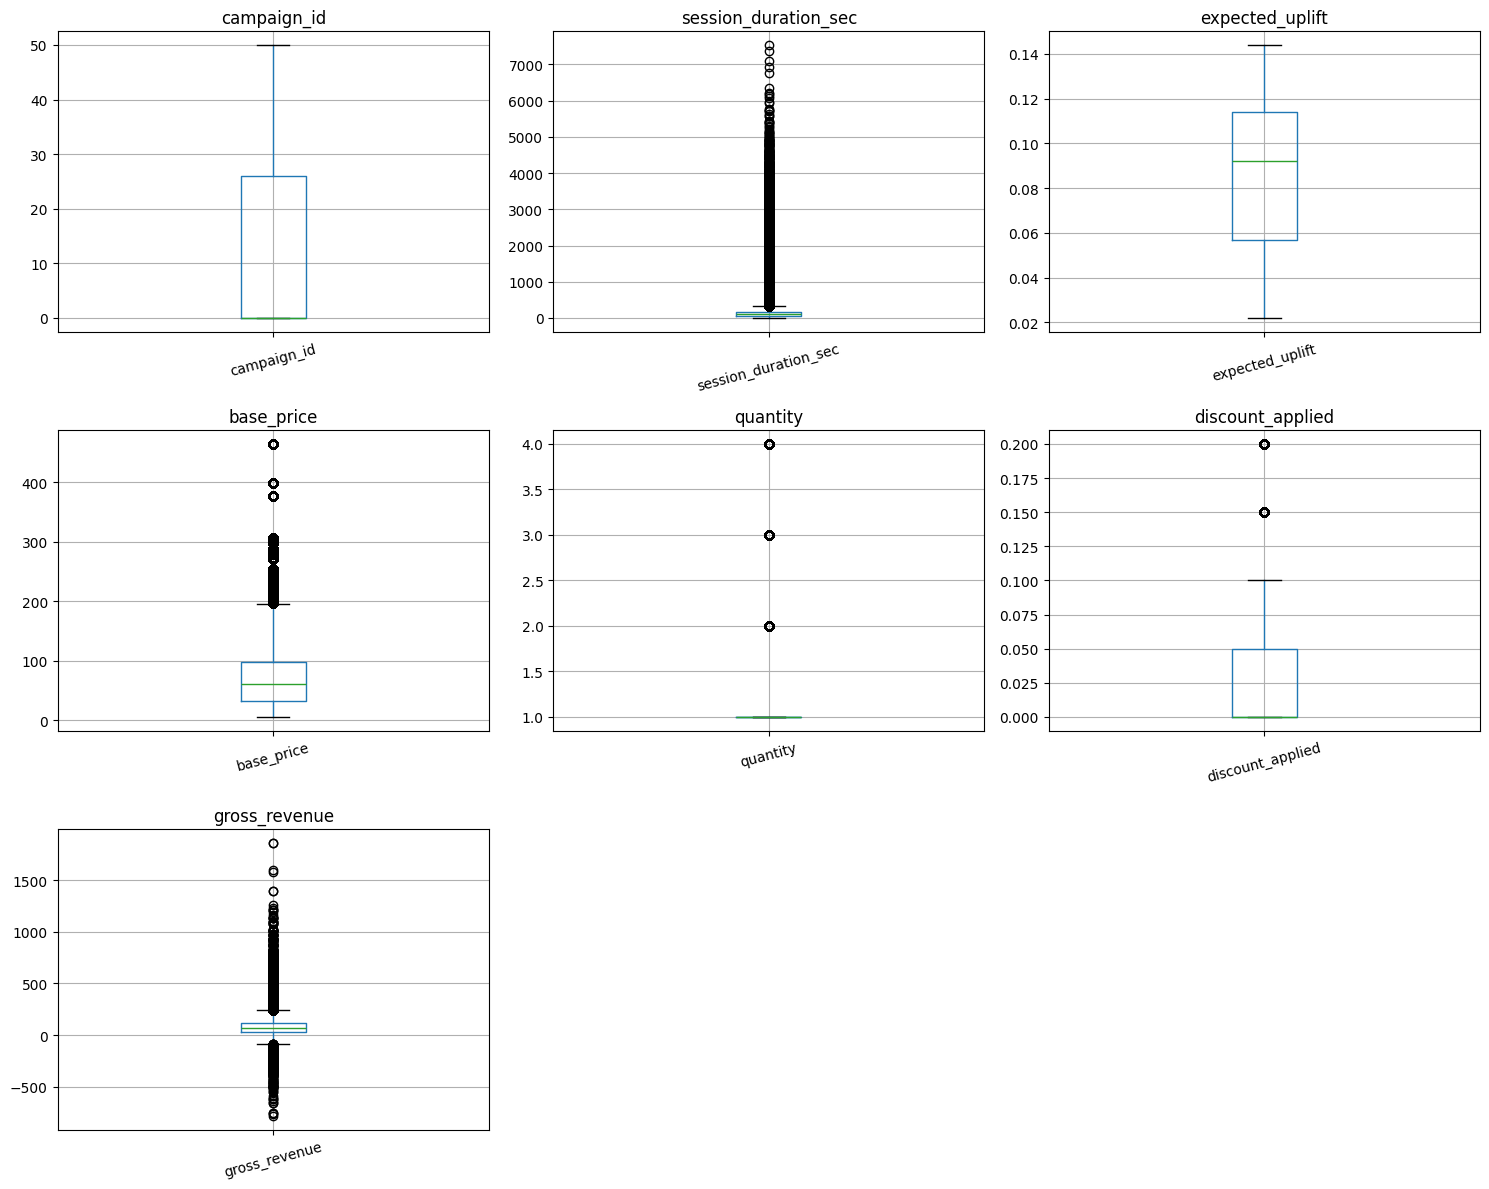

In [23]:

import math
import matplotlib.pyplot as plt

# колонки для boxplot
boxplot_cols = [
    "campaign_id",
    "session_duration_sec",
    "expected_uplift",
    "base_price",
    "quantity",
    "discount_applied",
    "gross_revenue"
]

# параметры сетки
n_cols = 3
n_rows = math.ceil(len(boxplot_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # превращаем в список

for i, col in enumerate(boxplot_cols):
    df_ss.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=15)

# скрываем пустые графики (если сетка больше количества колонок)
for j in range(len(boxplot_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from pandas.api.types import is_categorical_dtype

# ====== 1. ЧИСЛОВЫЕ ПОЛЯ (float / Int64) ======

# float-метрики, где NaN = отсутствие эффекта/значения
df_ss["expected_uplift"]   = df_ss["expected_uplift"].fillna(0.0)
df_ss["base_price"]        = df_ss["base_price"].fillna(0.0)
df_ss["discount_applied"]  = df_ss["discount_applied"].fillna(0.0)
df_ss["gross_revenue"]     = df_ss["gross_revenue"].fillna(0.0)

# целочисленные идентификаторы / флаги (тип Int64 — Nullable Integer)
# -1 = "нет id", 0 = "нет события / флаг выключен"
df_ss["product_id"]     = df_ss["product_id"].fillna(-1).astype("Int64")
df_ss["transaction_id"] = df_ss["transaction_id"].fillna(-1).astype("Int64")
df_ss["quantity"]       = df_ss["quantity"].fillna(0).astype("Int64")
df_ss["refund_flag"]    = df_ss["refund_flag"].fillna(0).astype("Int64")
df_ss["is_premium"]     = df_ss["is_premium"].fillna(0).astype("Int64")

# ====== 2. ДАТЫ ======

date_cols = ["campaign_start_date", "campaign_end_date", "launch_date"]

for col in date_cols:
    if col in df_ss.columns:
        # для дат оставляем NaT (логично: "дата отсутствует")
        df_ss[col] = df_ss[col].fillna(pd.NaT)

# ====== 3. КАТЕГОРИАЛЬНЫЕ ПОЛЯ (category / object) ======

# чем заполняем каждую категориальную колонку
cat_fill = {
    "device_type":          "unknown",
    "traffic_source":       "unknown",
    "event_type":           "unknown",
    "page_category":        "unknown",
    "experiment_group":     "unknown",
    "country":              "unknown",
    "gender":               "unknown",
    "loyalty_tier":         "unknown",
    "acquisition_channel":  "unknown",

    "campaign_channel":        "no_campaign",
    "campaign_objective":      "no_campaign",
    "campaign_target_segment": "no_campaign",

    "category":            "no_category",
    "brand":               "no_brand",
}

for col, value in cat_fill.items():
    if col not in df_ss.columns:
        continue

    if is_categorical_dtype(df_ss[col].dtype):
        # важно: сначала добавить новую категорию, потом fillna
        df_ss[col] = df_ss[col].cat.add_categories([value]).fillna(value)
    else:
        # если вдруг тип object, а не category
        df_ss[col] = df_ss[col].fillna(value)

# ====== 4. ПРОВЕРКА, ЧТО ВСЁ ЗАПОЛНИЛОСЬ ======
print(df_ss.isna().sum())


event_id                         0
timestamp                        0
customer_id                      0
session_id                       0
event_type                       0
product_id                       0
device_type                      0
traffic_source                   0
campaign_id                      0
page_category                    0
session_duration_sec             0
experiment_group                 0
signup_date                      0
country                          0
age                              0
gender                           0
loyalty_tier                     0
acquisition_channel              0
campaign_channel                 0
campaign_objective               0
campaign_start_date        1000264
campaign_end_date          1000264
campaign_target_segment          0
expected_uplift                  0
category                         0
brand                            0
base_price                       0
launch_date                 200371
is_premium          

C:\Users\Svitlana\AppData\Local\Temp\ipykernel_21540\267439034.py:55: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(df_ss[col].dtype):


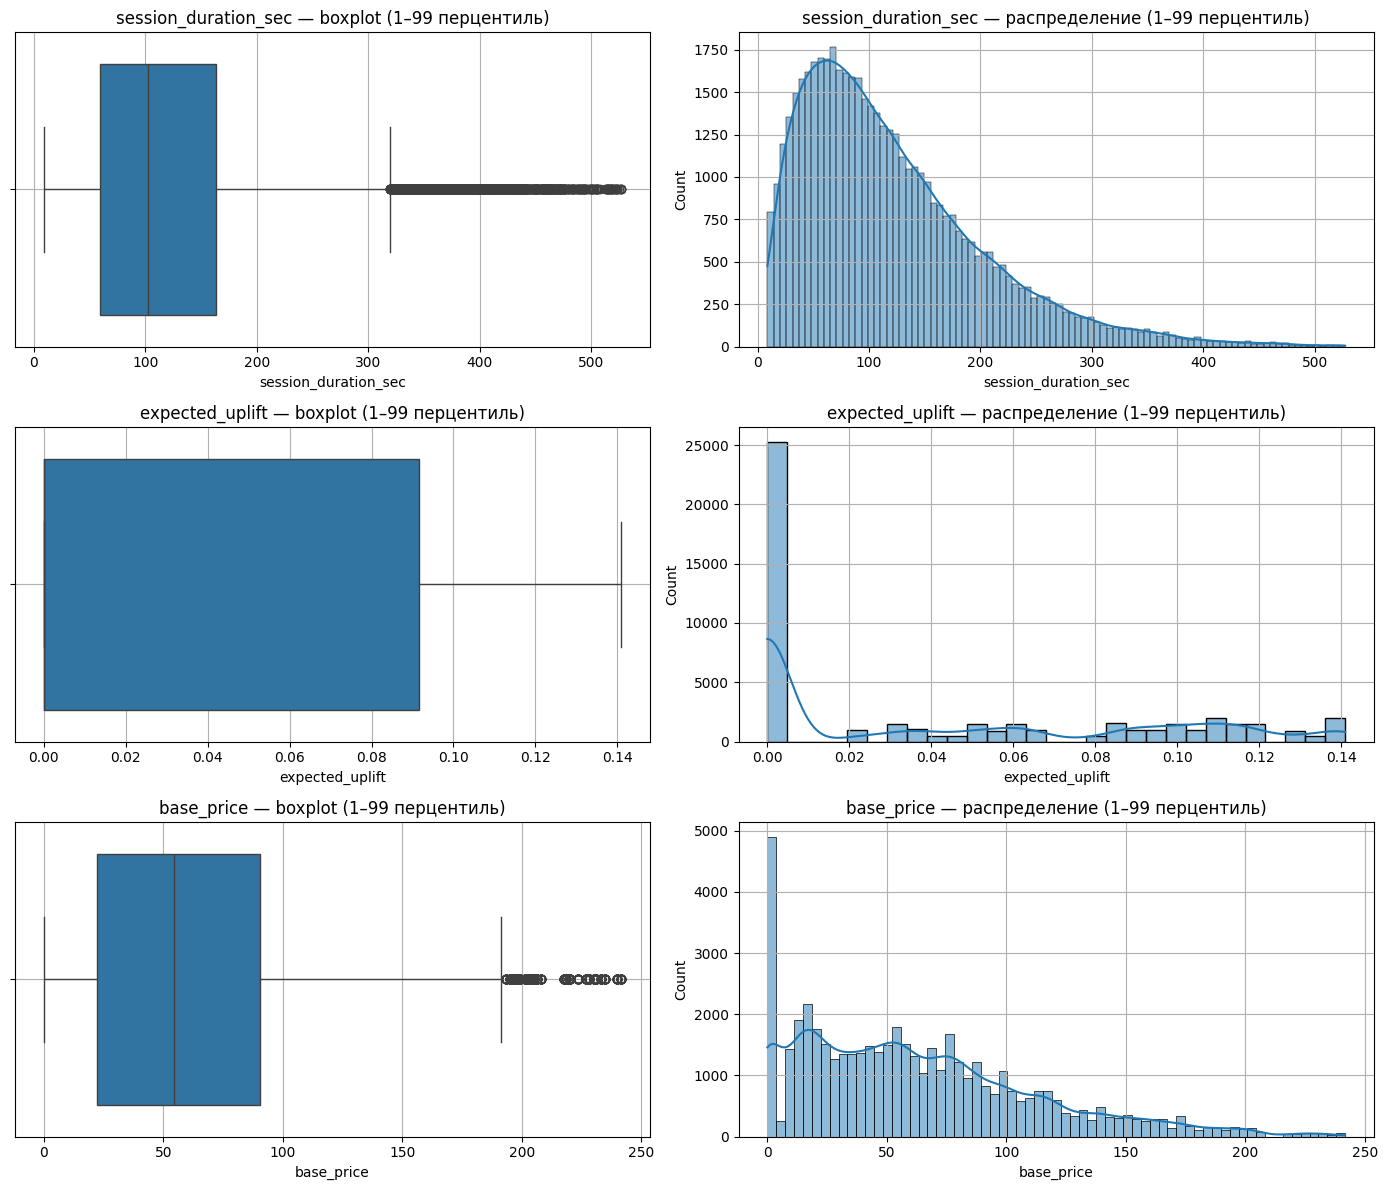

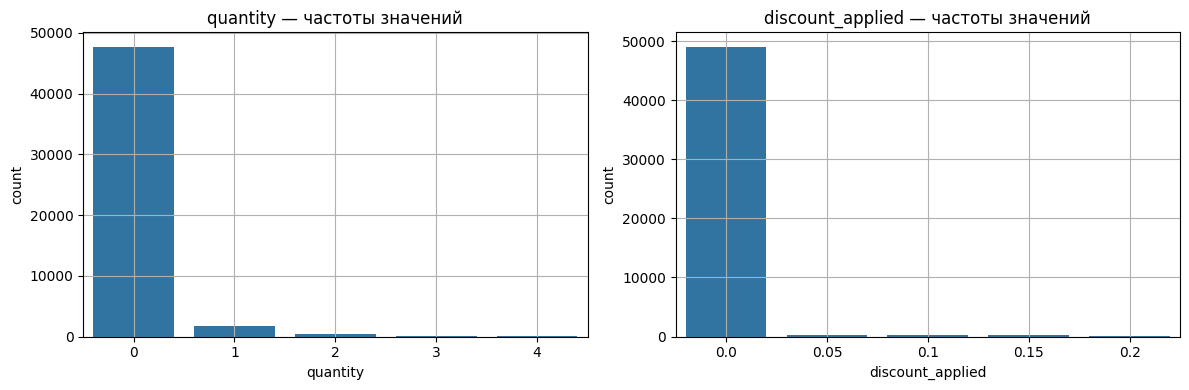

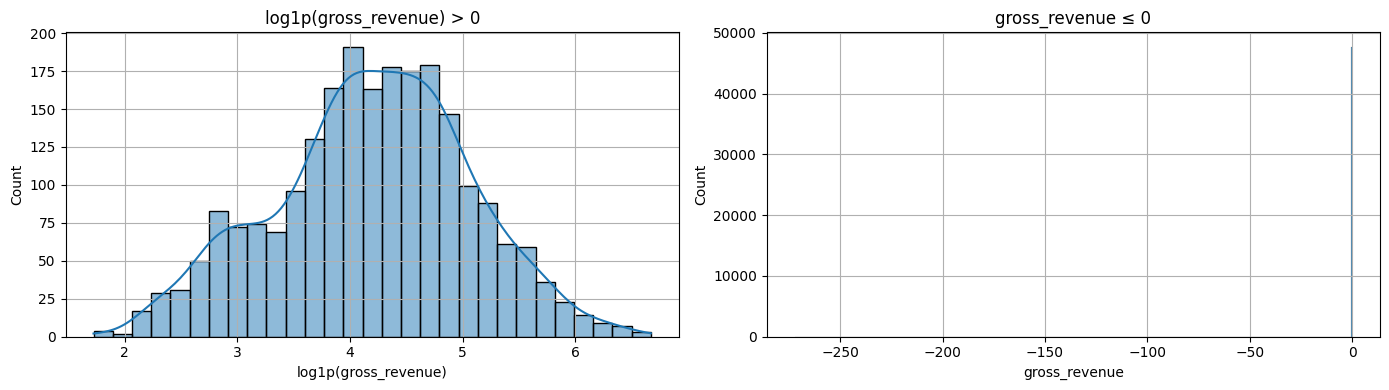

In [33]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# берём сэмпл, чтобы не тормозить
sample = df_ss.sample(50000, random_state=42)

# 1. НЕПРЕРЫВНЫЕ ПРИЗНАКИ: boxplot + hist
continuous_cols = ["session_duration_sec", "expected_uplift", "base_price"]

fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(14, 4 * len(continuous_cols)))
axes = axes.reshape(len(continuous_cols), 2)

for i, col in enumerate(continuous_cols):
    s = sample[col]

    # обрежем экстремальные выбросы по 1–99 перцентилю, чтобы всё было видно
    q1, q99 = s.quantile([0.01, 0.99])
    s_clip = s[(s >= q1) & (s <= q99)]

    # boxplot
    sns.boxplot(x=s_clip, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} — boxplot (1–99 перцентиль)")
    axes[i, 0].grid(True)

    # гистограмма
    sns.histplot(s_clip, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} — распределение (1–99 перцентиль)")
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


# 2. ДИСКРЕТНЫЕ ПРИЗНАКИ: barplot частот
discrete_cols = ["quantity", "discount_applied"]

fig, axes = plt.subplots(1, len(discrete_cols), figsize=(12, 4))

for i, col in enumerate(discrete_cols):
    vc = sample[col].value_counts().sort_index()
    sns.barplot(x=vc.index.astype(str), y=vc.values, ax=axes[i])
    axes[i].set_title(f"{col} — частоты значений")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("count")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# 3. GROSS_REVENUE: отдельно отрицательные и положительные
s = sample["gross_revenue"]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# положительные (с логарифмом)
pos = s[s > 0]
if len(pos) > 0:
    sns.histplot(np.log1p(pos), kde=True, ax=axes[0])
    axes[0].set_title("log1p(gross_revenue) > 0")
    axes[0].set_xlabel("log1p(gross_revenue)")
    axes[0].grid(True)

# отрицательные и нули
non_pos = s[s <= 0]
sns.histplot(non_pos, kde=False, ax=axes[1])
axes[1].set_title("gross_revenue ≤ 0")
axes[1].set_xlabel("gross_revenue")
axes[1].grid(True)

plt.tight_layout()
plt.show()



